In [9]:
import soundfile as sf
from scipy import signal

#read .wav file
input_signal,fs = sf.read('Sound_Noise.wav')
sampling_frequency = fs  #Sampling frequency of input signal
print((input_signal))

order = 4
#cutoff freq = 4000Hz
cutoff_freq = 4000
#digital_freq
Wn = 2*cutoff_freq/sampling_frequency
#print(Wn)
# b and a are the numerator and denominator polynomials respectively

b,a = signal.butter(order,Wn,'low')
#print(b,a)
#filter the input signal with Butterworth filter
output_signal = signal.filtfilt(b,a,input_signal)
print(output_signal)
sf.write('Sound_With_ReducedNoise.wav',output_signal,fs)

[0.03713989 0.03356934 0.02539062 ... 0.03622437 0.07455444 0.09649658]
[0.03747212 0.02478417 0.01157433 ... 0.02865229 0.06322313 0.09587512]


In [12]:
input_signal[-2]

0.074554443359375

In [ ]:
M = 10
s = 0
y = [0]*len(input_signal)
for n in range(len(input_signal)):
    for k in range(-10,11):
        s = s + input_signal[n-k-10]
    y[n] = (1/((2*M) + 1))*s 

In [19]:
print(y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
sf.write('Sound_With_ReducedNoise_using_MeanFilter.wav',y,fs)

In [20]:
###################################################################################################################

In [46]:
import soundfile as sf
from scipy import signal
from pandas import Series
import numpy as np
#read .wav file
input_signal,fs = sf.read('Sound_Noise.wav')
sampling_frequency = fs  #Sampling frequency of input signal
print((input_signal))
w = 201
mask=np.ones((1,w))/w
print(mask.shape)
mask=mask[0,:]
print(mask.shape)



[0.03713989 0.03356934 0.02539062 ... 0.03622437 0.07455444 0.09649658]
(1, 201)
(201,)


In [42]:
convolved_data=-np.convolve(input_signal,mask,'same')
 

ValueError: object too deep for desired array

In [35]:
print(len(convolved_data))

1226536


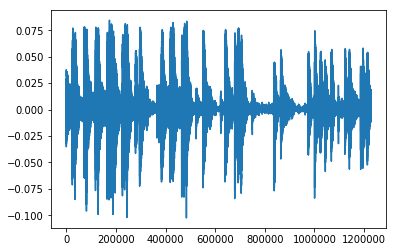

In [34]:
import matplotlib.pyplot as plt
plt.plot(convolved_data)
plt.show()

In [36]:
sf.write('Sound_With_ReducedNoise_using_MeanFilter.wav',convolved_data,fs)

/home/ganraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # Remove the CWD from sys.path while we load stuff.
/home/ganraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


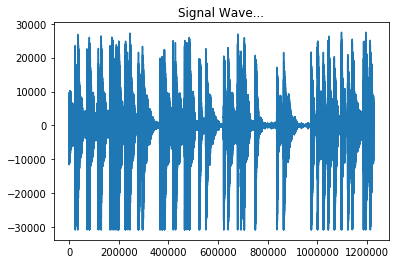

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open('Sound_Noise.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)